# 2. Moving Average & Signal

In [0]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('figure', figsize=(16, 4))

In [0]:
!pip install -q finance-datareader

In [0]:
import datetime
import pandas as pd
import FinanceDataReader as fdr

## Pandas Moving Average
* pandas.stats.rolling_mean()

In [0]:
# Kakao(035720)
df_kakao = fdr.DataReader("035720", '2019-01-01', '2019-06-30')
df_kakao.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,103500,105000,101500,102000,173462,-0.009709
2019-01-03,102500,105500,100500,102500,293989,0.004902
2019-01-04,102000,104000,101500,103500,251728,0.009756
2019-01-07,105000,107000,102000,103000,378153,-0.004831
2019-01-08,102500,103000,99500,99900,450462,-0.030097


In [0]:
df_kakao['% Change'] = df_kakao['Close'].pct_change() # pct_change : percent profit rate
df_kakao.head()

,Open,High,Low,Close,Volume,Change,% Change
Date,,,,,,,
2019-01-02,103500,105000,101500,102000,173462,-0.009709,NaN
2019-01-03,102500,105500,100500,102500,293989,0.004902,0.004902
2019-01-04,102000,104000,101500,103500,251728,0.009756,0.009756
2019-01-07,105000,107000,102000,103000,378153,-0.004831,-0.004831
2019-01-08,102500,103000,99500,99900,450462,-0.030097,-0.030097


In [0]:
df_kakao.shift(1).head() # moving below 1

,Open,High,Low,Close,Volume,Change,% Change
Date,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,103500.0,105000.0,101500.0,102000.0,173462.0,-0.009709,NaN
2019-01-04,102500.0,105500.0,100500.0,102500.0,293989.0,0.004902,0.004902
2019-01-07,102000.0,104000.0,101500.0,103500.0,251728.0,0.009756,0.009756
2019-01-08,105000.0,107000.0,102000.0,103000.0,378153.0,-0.004831,-0.004831


In [0]:
df_kakao['p_Close'] = df_kakao['Close'].shift(1) # p_Close : previous Close
df_kakao.head()

,Open,High,Low,Close,Volume,Change,% Change,p_Close
Date,,,,,,,,
2019-01-02,103500,105000,101500,102000,173462,-0.009709,NaN,NaN
2019-01-03,102500,105500,100500,102500,293989,0.004902,0.004902,102000.0
2019-01-04,102000,104000,101500,103500,251728,0.009756,0.009756,102500.0
2019-01-07,105000,107000,102000,103000,378153,-0.004831,-0.004831,103500.0
2019-01-08,102500,103000,99500,99900,450462,-0.030097,-0.030097,103000.0


In [0]:
import numpy as np

df_kakao['L_Profit'] = np.log(df_kakao['Close'] / df_kakao['p_Close']) # L_Profit : Log Profit Rate
df_kakao.head()

,Open,High,Low,Close,Volume,Change,% Change,p_Close,L_Profit
Date,,,,,,,,,
2019-01-02,103500,105000,101500,102000,173462,-0.009709,NaN,NaN,NaN
2019-01-03,102500,105500,100500,102500,293989,0.004902,0.004902,102000.0,0.004890
2019-01-04,102000,104000,101500,103500,251728,0.009756,0.009756,102500.0,0.009709
2019-01-07,105000,107000,102000,103000,378153,-0.004831,-0.004831,103500.0,-0.004843
2019-01-08,102500,103000,99500,99900,450462,-0.030097,-0.030097,103000.0,-0.030559


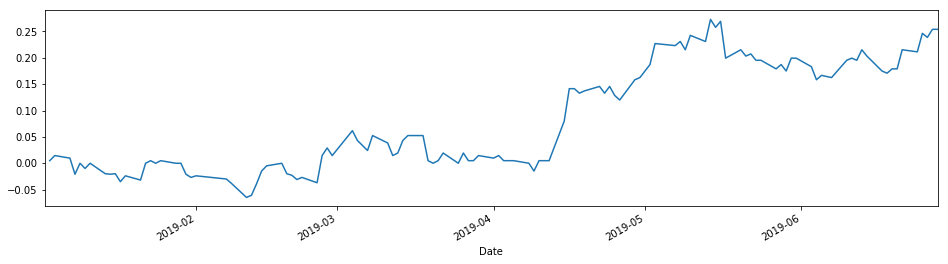

In [0]:
df_kakao['L_Profit'].cumsum().plot()

In [0]:
df_kakao['MA_5'] = df_kakao['Close'].rolling(center=False, window=5).mean()
df_kakao['MA_20'] = df_kakao['Close'].rolling(center=False, window=20).mean()
df_kakao['diff'] = df_kakao['MA_5'] - df_kakao['MA_20']

df_kakao = df_kakao[['Volume', 'Close', 'MA_5', 'MA_20', 'diff']]
df_kakao.head(20)

,Volume,Close,MA_5,MA_20,diff
Date,,,,,
2019-01-02,173462,102000,NaN,NaN,NaN
2019-01-03,293989,102500,NaN,NaN,NaN
2019-01-04,251728,103500,NaN,NaN,NaN
2019-01-07,378153,103000,NaN,NaN,NaN
2019-01-08,450462,99900,102180.0,NaN,NaN
2019-01-09,357096,102000,102180.0,NaN,NaN
2019-01-10,291573,101000,101880.0,NaN,NaN
2019-01-11,180561,102000,101580.0,NaN,NaN
2019-01-14,243305,100000,100980.0,NaN,NaN


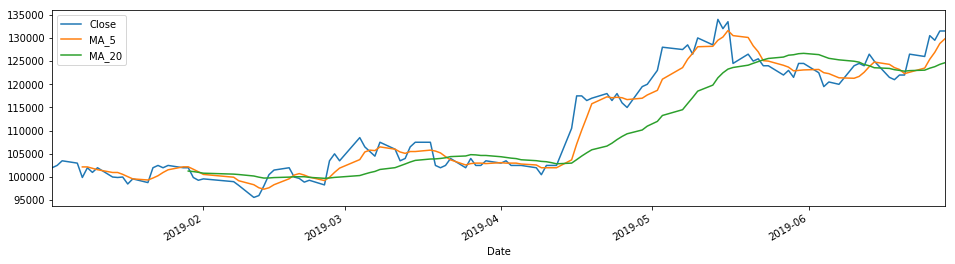

In [0]:
df_kakao[['Close', 'MA_5', 'MA_20']].plot()

## Golden Cross & Dead Cross

In [0]:
prev_key = prev_val = 0

for key, val in df_kakao['diff'].iteritems():
  if val == 0:
    continue
  if val * prev_val < 0 and val > prev_val:
    print('[Golden]', key, val, df_kakao['Close'][key])
  if val * prev_val < 0 and val < prev_val:
    print('[Dead]', key, val, df_kakao['Close'][key])
  prev_key, prev_val = key, val

[Dead] 2019-02-01 00:00:00 -265.0 99600
[Golden] 2019-02-19 00:00:00 365.0 100000
[Dead] 2019-02-25 00:00:00 -480.0 98300
[Golden] 2019-02-26 00:00:00 145.0 103500
[Dead] 2019-03-22 00:00:00 -705.0 104000
[Golden] 2019-04-15 00:00:00 700.0 110500
[Dead] 2019-05-23 00:00:00 -175.0 124000
[Golden] 2019-06-14 00:00:00 1225.0 125000
[Dead] 2019-06-20 00:00:00 -525.0 122000
[Golden] 2019-06-24 00:00:00 450.0 126000


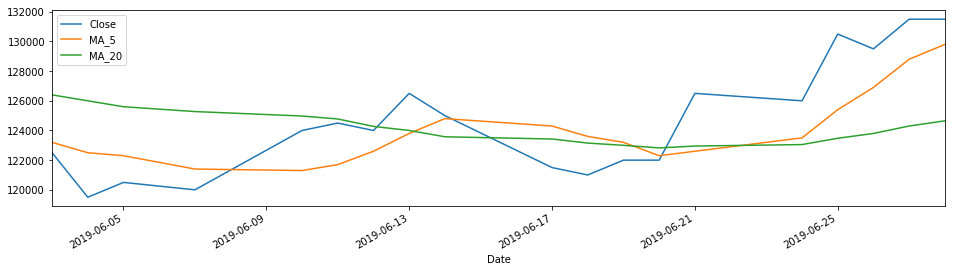

In [0]:
df_kakao[['Close', 'MA_5', 'MA_20']]['2019-06':].plot() # partial enlargement

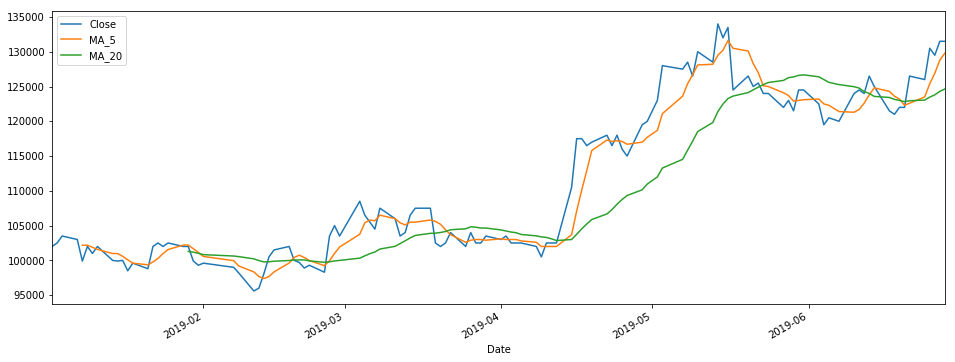

In [0]:
ax = df_kakao[['Close', 'MA_5', 'MA_20']].plot(figsize=(16, 6))

prev_key = prev_val = 0

for key, val in df_kakao['diff'].iteritems():
  if val == 0:
    continue
    
    if val * prev_val < 0 and val > prev_val:
        ax.annotate('Golden', xy=(key, df_kakao['MA_20'][key]), xytext=(10,-30), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    elif val * prev_val < 0 and val < prev_val:
        ax.annotate('Dead', xy=(key, df_kakao['MA_20'][key]), xytext=(10,30), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    
    prev_key, prev_val = key, val
